### Task 1

Read an image of your choice. Apply average and gaussian filters of size 5x5 individually and identify the differences b/w their results.

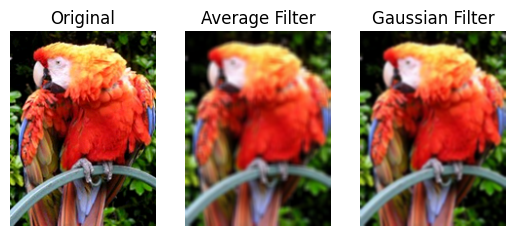

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plotter(details, row, columns):
    for i in range(len(details)):
        plt.subplot(row, columns, i + 1)
        plt.imshow(details[i][0], cmap = details[i][2] if len(details[i]) >= 3 else None)
        plt.title(details[i][1] if len(details[i]) >= 2 else "")
        plt.axis("off")

    plt.show()

imgT1 = cv2.cvtColor(cv2.imread("RGB_Bit_Depth_24.png"), cv2.COLOR_BGR2RGB)

kernel_size = 5

# Average Filter
imgT1AvgKernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
imgT1AvgFiltered = cv2.filter2D(imgT1, -1, imgT1AvgKernel)

# Gaussian Filter
imgT1GaussianFiltered = cv2.GaussianBlur(imgT1, (kernel_size, kernel_size), sigmaX=0)

plotter([[imgT1, "Original"],
        [imgT1AvgFiltered, "Average Filter"],
        [imgT1GaussianFiltered, "Gaussian Filter"]], 1, 3)

Comments:<br>
Average filter applies a blur effect more uniformly on the image, Gaussian preserves the form of the image while still blurring. Gaussian seems more pleasing to look at and more useful in my opinion for blurring skin etc.

### Task 2

Read an image of your choice which has salt and pepper noise. Apply rank filter of size 5x5 using rank = 13. What is the other name of this filtering? If you use rank = 1 or 25, will the noise increase or decrease?

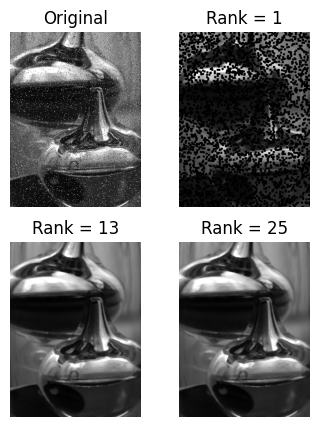

In [ ]:
from scipy.ndimage import rank_filter

imgT2 = cv2.imread("Noise_Salt_and_Pepper.png", cv2.IMREAD_GRAYSCALE)

# Scipy.ndimage.rank_filter counts rank from 0, so I used 0, 12 and 24 which correspond to 1, 13 and 25
imgT2R1 = rank_filter(imgT2, rank=0, size=(5, 5))
imgT2R13 = rank_filter(imgT2, rank=12, size=(5, 5))
imgT2R25 = rank_filter(imgT2, rank=24, size=(5, 5))

plt.figure(figsize=(4, 5))
plotter([[imgT2, "Original", "gray"],
        [imgT2R1, "Rank = 1", "gray"],
        [imgT2R13, "Rank = 13", "gray"],
        [imgT2R13, "Rank = 25", "gray"]], 2, 2)

Comments:<br>
Another name for 5x5 rank filter with rank = 13, is a median filter.
<br><br>
This filter removes abnormally dark and light spots but comparing the other pixels in the 5x5 area.
<br><br>
Rank 1 chooses the lowest value in the 5x5 area, so dark spots increase, and bright spots decrease. In the example, the dark noise increased.
<br><br>
Rank 25 does the opposite. But in the picture, noise was not seen…

### Task 3

Read the image. Write a function named ‘mylaplacian’ to MANUALLY code/implement 2nd order derivate of above read image in order to extract horizontal and vertical edges, collectively. Also, compare your results with ‘Sobel’ filter and state your findings.

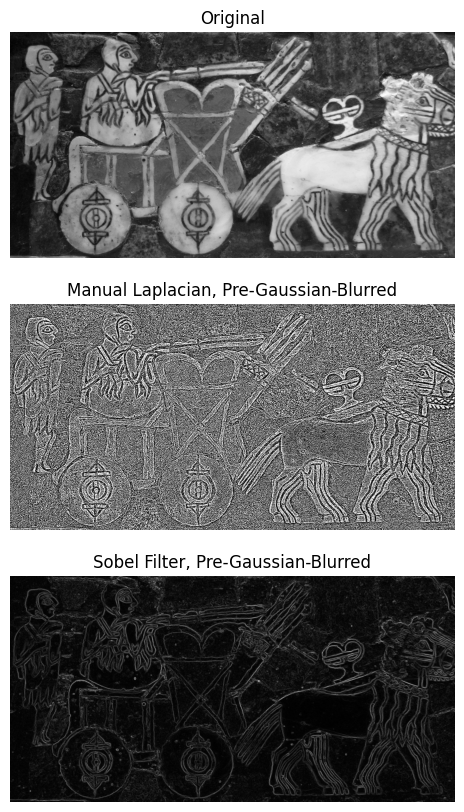

In [33]:
from scipy.ndimage import convolve

def mylaplacian(image):
    laplacian_kernel = np.array([[0, 1, 0],
                                [1, -4, 1],
                                [0, 1, 0]])
    return convolve(image, laplacian_kernel)

imgT3 = cv2.imread("Ur_Chariot.jpg", cv2.IMREAD_GRAYSCALE)
imgT3 = cv2.GaussianBlur(imgT3, (5, 5), sigmaX=0)

# Manual Laplacian
imgT3Laplacian = mylaplacian(imgT3)

# Sobel Filter
imgT3SobelX = cv2.Sobel(imgT3, cv2.CV_64F, 1, 0, ksize=3)
imgT3SobelY = cv2.Sobel(imgT3, cv2.CV_64F, 0, 1, ksize=3)
imgT3Sobel = cv2.magnitude(imgT3SobelX, imgT3SobelY)

plt.figure(figsize=(10, 10))
plotter([[imgT3, "Original", "gray"],
        [imgT3Laplacian, "Manual Laplacian, Pre-Gaussian-Blurred", "gray"],
        [imgT3Sobel, "Sobel Filter, Pre-Gaussian-Blurred", "gray"]], 3, 1)

Comments:<br>
Sobel filter extracts X and Y edges separately which need to be combined, but Laplacian filter extracts them at the same time.
<br><br>
The Laplacian filter is also more sensitive to changes/edges, but this adds a lot of noise to the image.
<br><br>
I used a Gaussian blur before applying any filter, so that improved the results a lot.
<br><br>
Laplacian filter is also brighter due to the noise, but it also looks crisper and more visible as compared to the Sobel filtered image.
